# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 16th May, 2025

### Steps to solve and upload the assignment

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/14z3q91F8xzPb8Hm-KxNGn-nkKacqB17v?usp=drive_link
<h3><span style="color:red"> Deadline: 31st May, 2025 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [1]:
"""Module to represent a library system."""


class Book:
    """Represent a single book in the library system."""
    def __init__(self, title, author, ISBN):
      self.title = title
      self.author = author
      self.ISBN = ISBN
      self.checked_out = False

    def is_available(self):
        return not self.checked_out

    def check_out(self):
      """Internal: mark book as checked out (used by Library.lend_book)."""
      if not self.checked_out:
          self.checked_out = True
      else:
          print(f"Book '{self.title}' is already checked out.")

    def check_in(self):
      """Internal: mark book as checked in (used by Library.return_book)."""
      if self.checked_out:
          self.checked_out = False
      else:
          print(f"Book '{self.title}' is already checked in.")


class Patron:
    """Represent a patron."""
    def __init__(self, patron_name):
        self.patron_name = patron_name
        self.patron_id = None
        self.borrowed_books = []

    def borrow_book(self, book):
        """Internal: add book to patron’s borrowed list."""
        if book not in self.borrowed_books:
            self.borrowed_books.append(book)
        else:
            print(f"{self.patron_name} already borrowed {book.title}")

    def return_book(self, book):
        """Internal: remove book from patron’s borrowed list."""
        if book in self.borrowed_books:
             self.borrowed_books.remove(book)


class Library:
    """Represents a library system that manages books and patrons."""
    def __init__(self, name):
        self.name = name
        self.book_list = {}
        self.patron_list = {}
        self.next_patron_id = 1

    def add_book(self, book):
        """Add book to the library."""
        if book.ISBN not in self.book_list:
            self.book_list[book.ISBN] = book
            print(f"Book '{book.title}' is added ")
        else:
            raise ValueError(f"Book with {book.ISBN} already exists")

    def lend_book(self, book, patron):
        """Lend a book to a patron if available and registered."""
        if patron.patron_id not in self.patron_list:
            raise ValueError(f"Patron '{patron.patron_name}' is not registered.")

        if book.ISBN not in self.book_list:
            raise ValueError(f"Book '{book.title}' is not in the library.")

        if not book.is_available():
            raise ValueError(f"Book '{book.title}' is not available.")

        # All conditions met for lending
        book.check_out()
        patron.borrow_book(book)
        print(f"Book '{book.title}' has been lent to {patron.patron_name}.")

    def return_book(self, book, patron):
        """Return a book by a registered patron."""
        if patron.patron_id not in self.patron_list:
            raise ValueError(f"Patron '{patron.patron_name}' is not registered.")

        if book.ISBN not in self.book_list:
            raise ValueError(f"Book '{book.title}' is not in the library.")

        if book not in patron.borrowed_books:
                raise ValueError(f"{patron.patron_name} did not borrow '{book.title}'.")

        # All conditions met for returning
        book.check_in()
        patron.return_book(book)
        print(f"Book '{book.title}' has been returned by {patron.patron_name}.")

    def add_patron(self, patron):
        """Add patron and generate unique patron id."""
        if patron.patron_id is None:
            patron.patron_id = self.next_patron_id
            self.next_patron_id += 1
            print(f"Patron {patron.patron_name} is added")
            self.patron_list[patron.patron_id] = patron
        else:
            raise ValueError(f"Patron {patron.patron_name} already exists")


if __name__ == "__main__":
    # example usage

    # create books
    my_book1=Book("The Hitchhiker's Guide to the Galaxy", "Douglas Adams", "978-0345391803")
    my_book2=Book("To Kill a Mockingbird", "Harper Lee", "978-0446310789")
    my_book3=Book("1984", "George Orwell", "978-0451524935")

    # create patrons
    my_patron1=Patron('John Doe')
    my_patron2=Patron('Jane Smith')
    my_patron3=Patron('Bob Johnson')

    # initialize the library
    my_library=Library("City Library")

    # add books and patrons
    my_library.add_book(my_book1)
    my_library.add_book(my_book2)
    my_library.add_book(my_book3)
    print("\n")

    my_library.add_patron(my_patron1)
    my_library.add_patron(my_patron2)
    my_library.add_patron(my_patron3)
    print("\n")

    # lend books
    my_library.lend_book(my_book1, my_patron1)
    my_library.lend_book(my_book2, my_patron2)
    my_library.lend_book(my_book3, my_patron3)
    print("\n")

    # return books
    my_library.return_book(my_book1, my_patron1)
    my_library.return_book(my_book2, my_patron2)
    my_library.return_book(my_book3, my_patron3)
    print("\n")





Book 'The Hitchhiker's Guide to the Galaxy' is added 
Book 'To Kill a Mockingbird' is added 
Book '1984' is added 


Patron John Doe is added
Patron Jane Smith is added
Patron Bob Johnson is added


Book 'The Hitchhiker's Guide to the Galaxy' has been lent to John Doe.
Book 'To Kill a Mockingbird' has been lent to Jane Smith.
Book '1984' has been lent to Bob Johnson.


Book 'The Hitchhiker's Guide to the Galaxy' has been returned by John Doe.
Book 'To Kill a Mockingbird' has been returned by Jane Smith.
Book '1984' has been returned by Bob Johnson.




## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [2]:
!pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 3.4 MB/s eta 0:00:00


In [3]:
"""Module to create base class shape and sub classes for Rectangle and Circle."""

from math import pi
import pint

ureg = pint.UnitRegistry()


class Shape:
    """Base class representing a geometric shape."""

    def area(self) -> pint.Quantity | None:
        """Return the area of the shape with units. Optional for subclasses to implement."""
        pass

    def perimeter(self) -> pint.Quantity:
        """Return the perimeter of the shape with units. Must be implemented in subclasses."""
        raise NotImplementedError


class Rectangle(Shape):
    """Rectangle-based subclass of Shape."""

    def __init__(self, length: float, breadth: float, unit: str = "cm"):
        """
        Initialize a rectangle with given length and breadth.

        Args:
            length (float): Length of the rectangle.
            breadth (float): Breadth of the rectangle.
            unit (str): Unit of measure for dimensions (length and breadth).
        """
        if length <= 0 or breadth <= 0:
            raise ValueError("Length and breadth must be positive numbers")

        self.length = length * ureg(unit)
        self.breadth = breadth * ureg(unit)

    def __str__(self) -> str:
        return (
            f"Rectangle(length={self.length.magnitude} {self.length.units:~}, "
            f"breadth={self.breadth.magnitude} {self.breadth.units:~})"
        )

    def area(self) -> pint.Quantity:
        """Return the area of the rectangle (unit^2)."""
        return self.length * self.breadth

    def perimeter(self) -> pint.Quantity:
        """Return the perimeter of the rectangle (unit)."""
        return 2 * (self.length + self.breadth)


class Circle(Shape):
    """Circle-based subclass of Shape."""

    def __init__(self, radius: float, unit: str ="cm"):
        """
        Initialize a circle with a given radius.

        Args:
            radius (float): Radius of the circle.
            unit (str): Unit of measure for the radius.
        """
        if radius <= 0:
            raise ValueError("Radius must be positive")
        self.radius = radius * ureg(unit)


    def __str__(self) -> str:
        return f"Circle(radius={self.radius.magnitude} {self.radius.units:~})"

    def area(self) -> pint.Quantity:
        """Return the area of the circle (unit^2)."""
        return pi * self.radius ** 2

    def perimeter(self) -> pint.Quantity:
        """Return the perimeter of the circle (unit)."""
        return 2 * pi * self.radius


if __name__ == "__main__":
    # example usage

    # create objects
    my_rectangle = Rectangle(5, 10, "m")
    my_circle = Circle(5, "m")

    # print objects directly using _str_ method
    print("The objects created:")
    print(my_rectangle)
    print(my_circle, "\n")

    # print area and perimeter for the rectangle
    print(f"The area of the rectangle is: {my_rectangle.area():~P.2f}")
    print(f"The perimeter of the rectangle is: {my_rectangle.perimeter():~P.2f}\n")

    # print area and perimeter for the circle
    print(f"The area of the circle is: {my_circle.area():~P.2f}")
    print(f"The perimeter of the circle is: {my_circle.perimeter():~P.2f}")

The objects created:
Rectangle(length=5 m, breadth=10 m)
Circle(radius=5 m) 

The area of the rectangle is: 50.00 m²
The perimeter of the rectangle is: 30.00 m

The area of the circle is: 78.54 m²
The perimeter of the circle is: 31.42 m


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [4]:
"""Module to represent Employee of a company."""


class Employee:
  """Base class representing an employee."""

  def __init__(self, name: str, employee_id: int) -> None:
      self.name = name
      self.employee_id = employee_id

  def calculate_paycheck(self) -> float:
      """Mandatory method for subclasses."""
      raise NotImplementedError(
          f"{self.__class__.__name__} must implement calculate_paycheck()"
      )


class SalariedEmployee(Employee):
  """Employee paid a fixed monthly salary."""

  def __init__(self, name: str, employee_id: int, monthly_salary: float):
        super().__init__(name, employee_id)
        if monthly_salary < 0:
            raise ValueError("Monthly salary cannot be negative")
        self.monthly_salary = monthly_salary

  def calculate_paycheck(self) -> float:
        return self.monthly_salary

  def __str__(self) -> str:
        return f"SalariedEmployee(name={self.name}, id={self.employee_id}, salary={self.monthly_salary})"


class HourlyEmployee(Employee):
    """Employee paid weekly, based on hourly rate and hours worked."""

    def __init__(self, name: str, employee_id: int, hourly_rate: float, hours_worked: float):
        super().__init__(name, employee_id)
        if hourly_rate < 0:
            raise ValueError("Hourly rate cannot be negative")
        if hours_worked < 0:
            raise ValueError("Hours worked cannot be negative")
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self) -> float:
        """Return the weekly paycheck amount for the employee."""
        weekly_pay = self.hours_worked * self.hourly_rate
        return weekly_pay

    def __str__(self) -> str:
        return (f"HourlyEmployee(name={self.name}, id={self.employee_id}, "
                f"hourly_rate={self.hourly_rate}, hours_worked={self.hours_worked})")


# example usage
if __name__ == "__main__":
    try:
        sal_emp = SalariedEmployee("Alice", 101, 5000)
        hourly_emp = HourlyEmployee("Bob", 102, 100, 40)

        # create a list of employees
        employees = [sal_emp, hourly_emp]

        # Polymorphic iteration
        for emp in employees:
            print(f"Employee Type: {emp.__class__.__name__}")
            print(emp)
            print(f"Paycheck: {emp.calculate_paycheck()}\n")

    except ValueError as e:
        print(f"Error: {e}")



Employee Type: SalariedEmployee
SalariedEmployee(name=Alice, id=101, salary=5000)
Paycheck: 5000

Employee Type: HourlyEmployee
HourlyEmployee(name=Bob, id=102, hourly_rate=100, hours_worked=40)
Paycheck: 4000



## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers.
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients.

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value.

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer.

Test your implementation.

Original degree: 0
Cannot change degree: property 'degree' of 'Polynomial' object has no setter
Original degree: 0
Polynomial (degree 0): 42
Evaluate at 10: 42.0
Derivative expression: 0
Derivative at 10: 0.0
Polynomial: 3*x**4 + 5*x**3 + x**2 + 9*x + 10
Value at x=5: 2580.0
Derivative at x=10: 13529.0


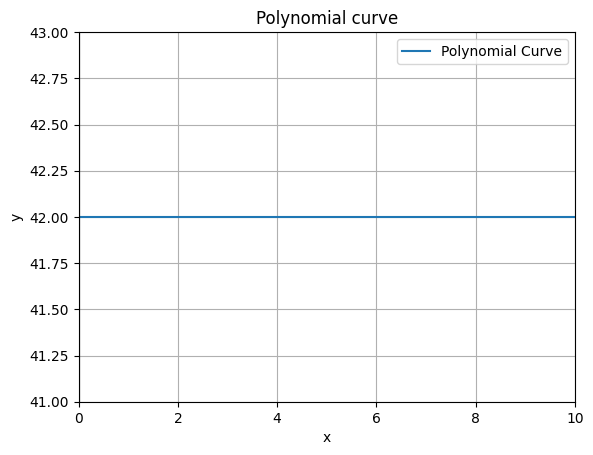

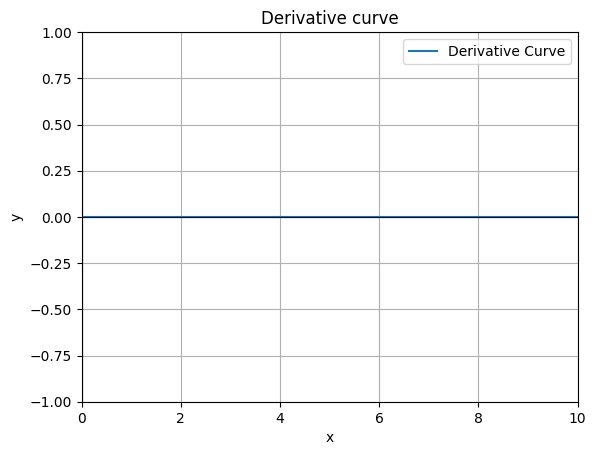

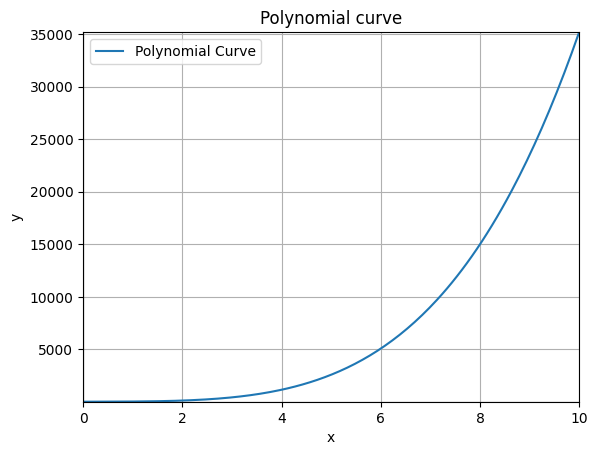

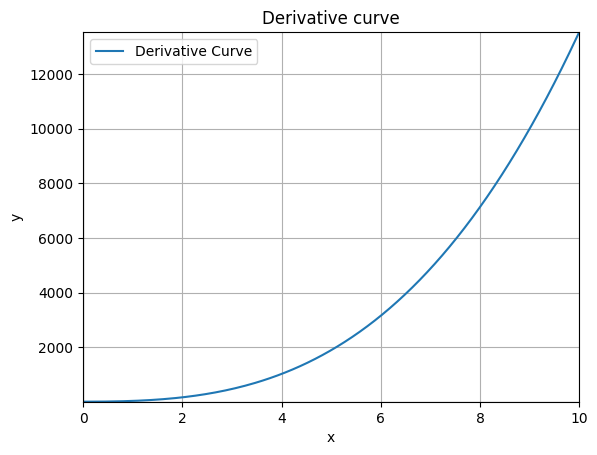

In [5]:
"""
   Module to generate polynomial equation and its derivative of a given order
   and coefficients.
   Evaluate and plot the polynomials for values of x over a range.
"""
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Sequence
from matplotlib.figure import Figure


class Polynomial:
    """
    Class representing a polynomial in one variable.

    Parameters
    ----------
    degree : int
        Degree of the polynomial (must be >= 0).

    coefficients : Sequence[float]
        Coefficients of the polynomial in descending order of power.

        Example:
            For 3x^4 + 5x^3 + x^2 + 9x + 10,
            use degree=4 and coefficients=[3, 5, 1, 9, 10].
    """

    def __init__(self, degree: int, coefficients: Sequence[float]) -> None:
        if degree < 0:
            raise ValueError("Degree must be a non-negative integer.")

        if degree > 0 and coefficients[0] == 0:
            raise ValueError("Leading coefficient cannot be zero for non-constant polynomials.")

        if len(coefficients) != degree + 1:
            raise ValueError("Coefficients should be = degree + 1")

        if not all(isinstance(c, (int, float)) for c in coefficients):
           raise TypeError("All coefficients must be numbers")

        # All conditions met for attribute creation
        self.__degree = degree
        self.__coefficients = list(coefficients)

        self.__x = sp.symbols('x')
        self.__poly_expr = sp.Poly.from_list(self.__coefficients, gens=self.__x).as_expr()
        self.__derivative_expr = sp.diff(self.__poly_expr, self.__x)

        # Precompute lambdified functions for numeric evaluation
        self.__poly_func = sp.lambdify(self.__x, self.__poly_expr, "numpy")
        self.__derivative_func = sp.lambdify(self.__x, self.__derivative_expr, "numpy")

    @property
    def degree(self):
        return self.__degree

    @property
    def coefficients(self):
        return tuple(self.__coefficients)

    @property
    def x(self):
        return self.__x

    @property
    def poly_expr(self) -> sp.Expr:
        """Getter method."""
        return self.__poly_expr

    @property
    def derivative_expr(self) -> sp.Expr:
        """Getter method."""
        return self.__derivative_expr

    def evaluate(self, x: float) -> float:
        """Evaluate the polynomial at a single point x."""
        return float(self.__poly_func(x))

    def derivative(self, x: float) -> float:
        """Evaluate the derivative at a single point x."""
        return float(self.__derivative_func(x))

    def plot(self, x_range: Tuple[float, float]) -> Figure:
        """Plot the polynomial."""

        # Generate the x_vals and y_vals
        x_vals = np.linspace(x_range[0], x_range[1], 200)
        y_vals = self.__poly_func(x_vals)

        # Ensure y_vals is an array even if the polynomial is constant
        if np.isscalar(y_vals):
            y_vals = np.full_like(x_vals, y_vals)

        # Create figure and axes
        fig, ax = plt.subplots()
        ax.plot(x_vals, y_vals, label="Polynomial Curve")

        # Add axes lines at x=0 and y=0
        ax.axhline(0, color="black", linewidth=0.8)
        ax.axvline(0, color="black", linewidth=0.8)

        # Set axis limits
        ax.set_xlim(x_range[0], x_range[1])
        ax.set_ylim(min(y_vals) - 1, max(y_vals) + 1)

        # Labels and styling
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title("Polynomial curve")
        ax.legend()
        ax.grid()
        return fig

    def plot_derivative(self, x_range: Tuple[float, float]) -> Figure:
        """Plot the derivative."""

        # Generate the x_vals and y_vals
        x_vals = np.linspace(x_range[0], x_range[1], 200)
        y_vals = self.__derivative_func(x_vals)

        # Ensure y_vals is an array even if the polynomial is constant
        if np.isscalar(y_vals):
           y_vals = np.full_like(x_vals, y_vals)

        # Create figure and axes
        fig, ax = plt.subplots()
        ax.plot(x_vals, y_vals, label="Derivative Curve")

        # Add axes lines at x=0 and y=0
        ax.axhline(0, color="black", linewidth=0.8)
        ax.axvline(0, color="black", linewidth=0.8)

        # Set axis limits
        ax.set_xlim(x_range[0], x_range[1])
        ax.set_ylim(min(y_vals) - 1, max(y_vals) + 1)

        # Labels and styling
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title("Derivative curve")
        ax.legend()
        ax.grid()
        return fig

    def __str__(self) -> str:
        return str(self.poly_expr)

    def __repr__(self) -> str:
        return f"Polynomial(degree={self.degree}, coefficients={self.coefficients})"


if __name__ == "__main__":
    # Test degree = 0 (constant polynomial)
    degree = 0
    coefficients = [42]
    p0 = Polynomial(degree, coefficients)
    print("Original degree:", p0.degree)

    # Try to change the degree
    try:
        p0.degree = 10      # ❌ should raise AttributeError
    except AttributeError as e:
        print("Cannot change degree:", e)
    print("Original degree:", p0.degree)

    expr0 = p0.poly_expr
    print("Polynomial (degree 0):", expr0)            # prints: 42
    print("Evaluate at 10:", p0.evaluate(10))         # prints: 42.0
    expr1 = p0.derivative_expr
    print("Derivative expression:", expr1)  # prints: 0
    print("Derivative at 10:", p0.derivative(10))     # prints: 0.0
    # Plotting degree 0 polynomial
    plt1 = p0.plot((0, 10))
    plt2 = p0.plot_derivative((0, 10))

    # Example for degree 4
    degree = 4
    coefficients = [3, 5, 1, 9, 10]
    p1 = Polynomial(degree, coefficients)
    poly_expr = p1.poly_expr
    print("Polynomial:", poly_expr)
    print("Value at x=5:", p1.evaluate(5))
    derivative_expr = p1.derivative_expr
    print("Derivative at x=10:", p1.derivative(10))
    plt3 = p1.plot((0, 10))
    plt4 = p1.plot_derivative((0, 10))

    # Show plots
    plt1.show()
    plt2.show()
    plt3.show()
    plt4.show()



## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [6]:
"""
Module to design a simple online shopping cart application.

This module defines Product and ShoppingCart classes to manage items.
"""


class Product:
    """Represents a product."""

    def __init__(self, name: str, price: float) -> None:
        self.name = name
        self.price = price

    def __str__(self) -> str:
        return f"{self.name} | Price: {self.price}"


class ShoppingCart:
    """Represents a shopping cart that holds products."""

    def __init__(self) -> None:
        """Initialize the cart."""
        self._basket = []

    def add_item(self, product: Product) -> None:
        """Add a product to the cart."""
        self._basket.append(product)

    def remove_item(self, product_name: str) -> None:
        """Remove the first matching product by name."""
        for item in self._basket:
            if item.name == product_name:
                self._basket.remove(item)
                break

    def calculate_total(self) -> float:
        """Calculate the total price for all the products."""
        return sum(item.price for item in self._basket)

    def show_cart(self) -> None:
        """Display all the items in the cart."""
        if not self._basket:
            print("Cart is empty.")
            return
        for item in self._basket:
            print(item)


if __name__ == "__main__":
    """Example usage of ShoppingCart."""

    # create product instances
    product1 = Product("Pen", 20)
    product2 = Product("Pencil", 2)

    # initialize shopping cart
    cart_1 = ShoppingCart()

    # add products to cart
    cart_1.add_item(product1)
    cart_1.add_item(product2)

    # display cart contents and total
    print("\nShopping cart contents:")
    cart_1.show_cart()
    print(f"Total amount: {cart_1.calculate_total()}")

    # remove a product from cart
    cart_1.remove_item(product2.name)

    # display updated cart and total
    print("\nUpdated shopping cart contents:")
    cart_1.show_cart()
    print(f"Total amount: {cart_1.calculate_total()}")




Shopping cart contents:
Pen | Price: 20
Pencil | Price: 2
Total amount: 22

Updated shopping cart contents:
Pen | Price: 20
Total amount: 20
